<a href="https://colab.research.google.com/github/Jyoti-501/dsa/blob/main/Dymaic_Pricing_Dynamo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/pricing_data.csv')

# Preview the first few rows of the dataset
print(data.head())

# Check for missing values
print(data.isnull().sum())


   product_id        date  price  demand  competitor_price  inventory
0           1  2024-10-12  32.66      94             39.04        803
1           1  2024-10-09  99.32     118             44.90        395
2           1  2024-10-01  31.07     131             41.47        328
3           1  2024-10-09  58.21     130             71.06        577
4           1  2024-10-08  44.19      44             29.14        348
product_id          0
date                0
price               0
demand              0
competitor_price    0
inventory           0
dtype: int64


In [2]:
# Fill any missing values if needed
data.fillna(method='ffill', inplace=True)

# Convert the date column to datetime type
data['date'] = pd.to_datetime(data['date'])

# Check the data types
print(data.dtypes)


product_id                   int64
date                datetime64[ns]
price                      float64
demand                       int64
competitor_price           float64
inventory                    int64
dtype: object


<ipython-input-2-e03d81e9a464>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


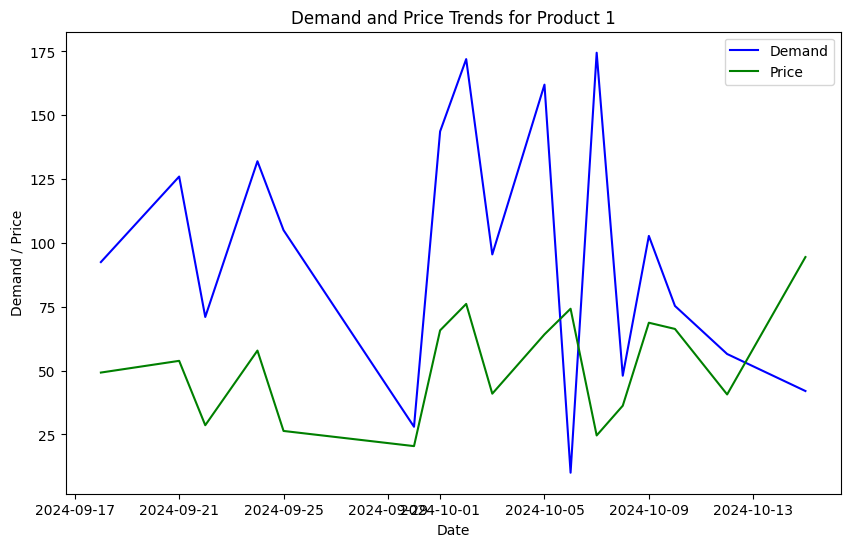

In [3]:
# Group data by product and date to see average price and demand trends
grouped_data = data.groupby(['product_id', 'date']).mean().reset_index()

# Plot the demand and price trends for a specific product
product_id = 1  # Change this to any product_id in your dataset
product = grouped_data[grouped_data['product_id'] == product_id]

plt.figure(figsize=(10,6))
plt.plot(product['date'], product['demand'], label='Demand', color='blue')
plt.plot(product['date'], product['price'], label='Price', color='green')
plt.xlabel('Date')
plt.ylabel('Demand / Price')
plt.title(f'Demand and Price Trends for Product {product_id}')
plt.legend()
plt.show()


In [4]:
# Define a simple dynamic pricing function
def dynamic_pricing(demand, competitor_price, inventory, base_price):
    if demand > 100:
        price_increase = 0.05  # Increase price by 5% if demand is high
    elif demand < 50:
        price_increase = -0.05  # Decrease price by 5% if demand is low
    else:
        price_increase = 0  # Keep price constant if demand is moderate

    # Adjust price based on competitor pricing
    if competitor_price < base_price:
        price_adjustment = -0.03  # Decrease price if competitor is cheaper
    else:
        price_adjustment = 0.03  # Increase price if competitor is more expensive

    # Adjust based on inventory
    if inventory < 100:
        inventory_adjustment = 0.10  # Increase price if inventory is low
    else:
        inventory_adjustment = 0

    # Calculate the final adjusted price
    final_adjustment = price_increase + price_adjustment + inventory_adjustment
    new_price = base_price * (1 + final_adjustment)
    return round(new_price, 2)

# Apply dynamic pricing to the dataset
data['new_price'] = data.apply(lambda row: dynamic_pricing(row['demand'], row['competitor_price'], row['inventory'], row['price']), axis=1)

# View the updated data with new prices
print(data[['product_id', 'date', 'price', 'new_price']].head())



   product_id       date  price  new_price
0           1 2024-10-12  32.66      33.64
1           1 2024-10-09  99.32     101.31
2           1 2024-10-01  31.07      33.56
3           1 2024-10-09  58.21      62.87
4           1 2024-10-08  44.19      40.65


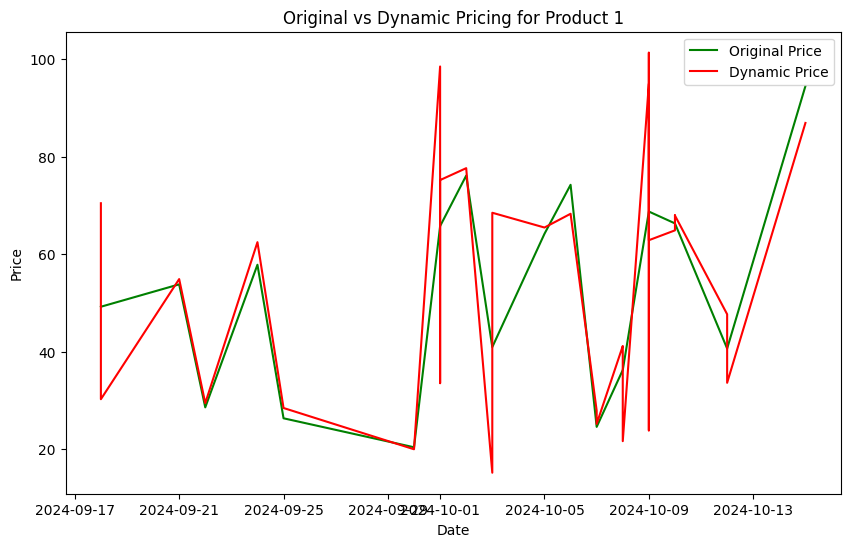

In [6]:
# Get the product-specific data for original prices
product = grouped_data[grouped_data['product_id'] == product_id]

# Get the dynamically priced data, ensuring alignment by using the same date range as the original data
dynamic_price_data = data[(data['product_id'] == product_id) & (data['date'].isin(product['date']))]

# Ensure the two datasets are aligned by date
dynamic_price_data = dynamic_price_data.sort_values(by='date')

# Plot original price and dynamic price on the same graph
plt.figure(figsize=(10,6))
plt.plot(product['date'], product['price'], label='Original Price', color='green')
plt.plot(dynamic_price_data['date'], dynamic_price_data['new_price'], label='Dynamic Price', color='red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title(f'Original vs Dynamic Pricing for Product {product_id}')
plt.legend()
plt.show()


In [7]:
# Save the updated data to a new CSV file
data.to_csv('/content/updated_pricing_data.csv', index=False)

# Download the file locally
from google.colab import files
files.download('/content/updated_pricing_data.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>